3(a).  apply average & median spatial filters with 5x5 mask & observe their performance for noise suppression in term of PSNR

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Function for Average Spatial Filter
Function: output_image = cv2.blur(input_image, (kernel_size, kernel_size))

In [14]:
def average_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset, weight = mask_size // 2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            filtered_image[r, c] = 0;
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        filtered_image[r, c] += (image[r + x, c + y] / weight)
    
    return np.uint8(filtered_image)

Function for Median Spatial Filter
Function: output_image = cv2.medianBlur(input_image, kernel_size)

In [15]:
def median_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset = mask_size // 2

    for r in range(height):
        for c in range(width):
            pixels = []
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixels.append(image[r + x, c + y])
            filtered_image[r, c] = sorted(pixels)[len(pixels) // 2]
    
    return np.uint8(filtered_image)

Function for adding Salt & Pepper Noise

In [16]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for k in range(int(noise_amount)):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image

Function for calculating PSNR (Peak Signal to Noise Ratio)
Function: psnr = cv2.PSNR(image1, image2)

In [17]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)

loading the image

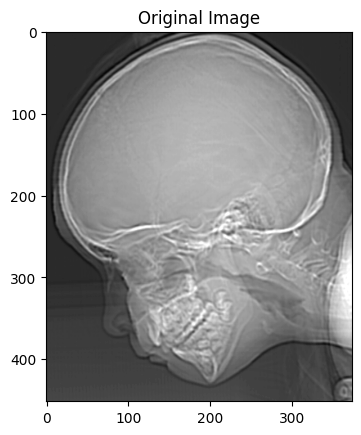

In [18]:
character_image = cv2.imread("./Skull 374x452.tif", 0)
plt.imshow(character_image, cmap = "gray")
plt.title("Original Image")
plt.show()

Adding Salt & Pepper Noise to the Image

In [19]:
noisy_character_image = add_salt_pepper_noise(character_image, 15)
plt.imshow(noisy_character_image, cmap = "gray")
plt.title("The Noisy Image")
plt.show()
psnr = compute_psnr(character_image, noisy_character_image)
print(f"PSNR = {psnr}")

IndexError: index 435 is out of bounds for axis 1 with size 374

applying average spatial filter

In [20]:
mask_size = 3
avg_character_image = average_filter(noisy_character_image, mask_size)
plt.imshow(avg_character_image, cmap = "gray")
plt.title("Average Filtered Image")
plt.show()
psnr = compute_psnr(avg_character_image, character_image)
print(f"PSNR = {psnr}")

NameError: name 'noisy_character_image' is not defined

Applying Median Spatial Filter

In [21]:
mask_size = 3
median_character_image = median_filter(noisy_character_image, mask_size)
plt.imshow(avg_character_image, cmap = "gray")
plt.title("Median Filtered Image")
plt.show()
psnr = compute_psnr(median_character_image, character_image)
print(f"PSNR = {psnr}")

NameError: name 'noisy_character_image' is not defined

Loading the Noisy Image

TypeError: Image data of dtype object cannot be converted to float

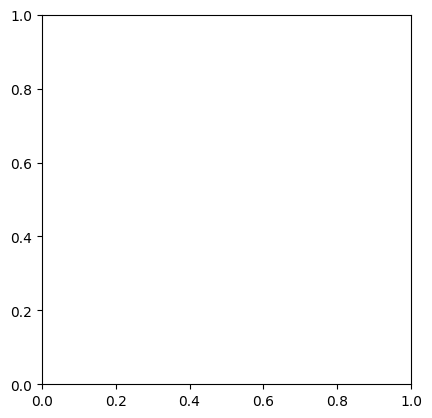

In [22]:
noisy_pcb_image = cv2.imread("./Noisy PCB 455x440.tif", 0)
plt.imshow(noisy_pcb_image, cmap = "gray")
plt.title("The Noisy Image")
plt.show()

Applying Average Spatial Filter

In [23]:
mask_size = 5
avg_noisy_pcb_image = average_filter(noisy_pcb_image, mask_size)
plt.imshow(avg_noisy_pcb_image, cmap = "gray")
plt.title("Average Filtered Image")
plt.show()

AttributeError: 'NoneType' object has no attribute 'copy'

Applying Median Spatial Filter

In [24]:
mask_size = 5
median_noisy_pcb_image = median_filter(noisy_pcb_image, mask_size)
plt.imshow(median_noisy_pcb_image, cmap = "gray")
plt.title("Median Filtered Image")
plt.show()

AttributeError: 'NoneType' object has no attribute 'copy'

3(b).   use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression & observe their performance in term of PSNR

Function for Average Spatial Filter
Function: output_image = cv2.blur(input_image, (kernel_size, kernel_size))

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def average_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset, weight = mask_size // 2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            filtered_image[r, c] = 0;
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        filtered_image[r, c] += (image[r + x, c + y] / weight)
    
    return np.uint8(filtered_image)

Function for adding Salt & Pepper Noise

In [27]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for k in range(int(noise_amount)):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image

Function for calculating PSNR (Peak Signal to Noise Ratio)
Function: psnr = cv2.PSNR(image1, image2)

In [28]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)

loading image

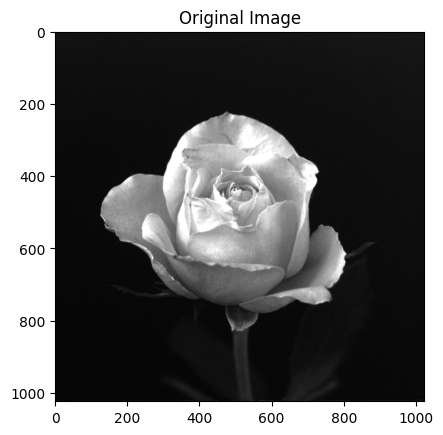

In [29]:
character_image = cv2.imread("./Rose 1024x1024.tif", 0)
plt.imshow(character_image, cmap = "gray")
plt.title("Original Image")
plt.show()

adding salt and paper noise to the image

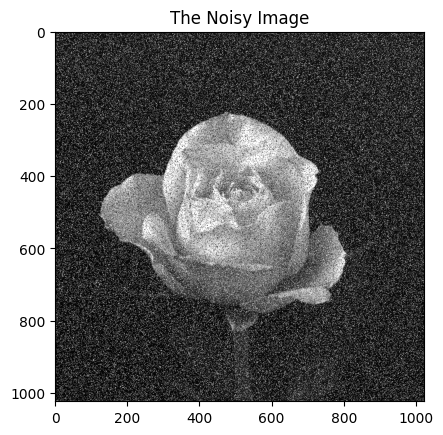

PSNR = 9.66


In [30]:
noisy_character_image = add_salt_pepper_noise(character_image, 15)
plt.imshow(noisy_character_image, cmap = "gray")
plt.title("The Noisy Image")
plt.show()
psnr = compute_psnr(character_image, noisy_character_image)
print(f"PSNR = {psnr}")

applying average filter with (3*3, 5*5, 7*7) mask

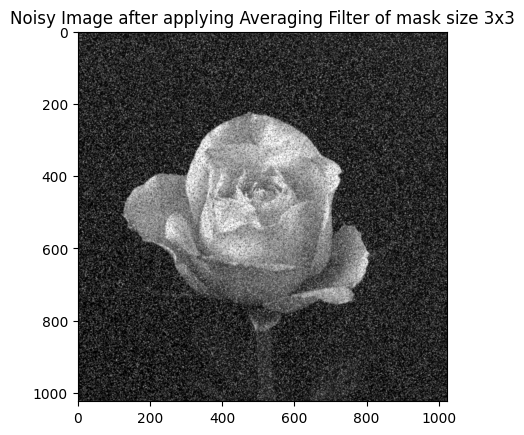

PSNR = 10.63


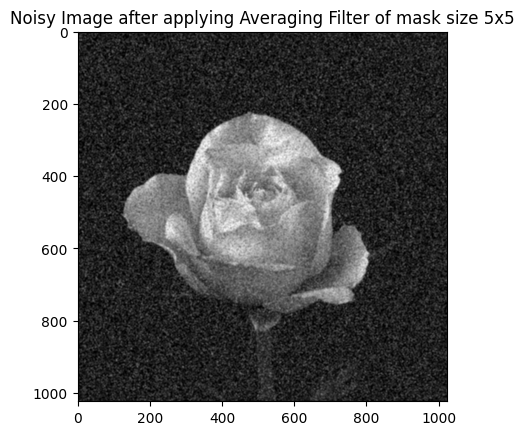

PSNR = 10.23


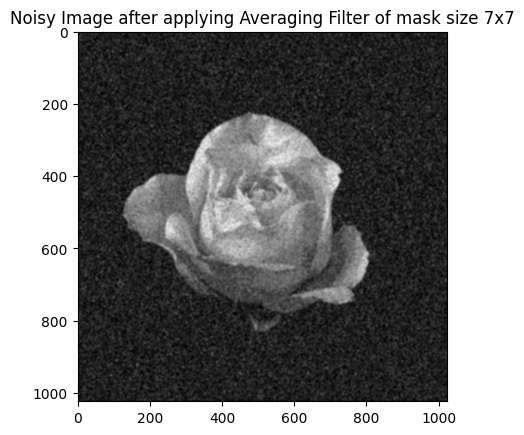

PSNR = 10.08


In [31]:
for mask_size in range(3, 8, 2):
    avg_character_image = average_filter(noisy_character_image, mask_size)
    plt.imshow(cv2.cvtColor(avg_character_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Noisy Image after applying Averaging Filter of mask size {mask_size}x{mask_size}")
    plt.show()
    print(f"PSNR = {compute_psnr(noisy_character_image, avg_character_image)}")

3(c)  apply harmonic & geometric mean filter on the noisy image & compare their performance with PSNR

Function for Harmonic Mean Filter
The Harmonic Mean Filter works well for salt noise, but fails for pepper noise

In [33]:
def apply_harmonic_mean_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape 
    offset, number_of_pixel = mask_size // 2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            pixel = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixel += float(1 / (image[r + x, c + y] + 1e-4))
            pixel = number_of_pixel / pixel
            filtered_image[r, c] = 255 if pixel > 255 else pixel

    return np.uint8(filtered_image)

Function for Geometric Mean Filter

In [34]:
def apply_geometric_mean_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset = mask_size // 2

    for r in range(height):
        for c in range(width):
            pixel = 1
            count = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        if (image[r + x, c + y]):
                            count += 1
                            pixel = pixel * int(image[r + x, c + y])
            count = 1 if count == 0 else count
            filtered_image[r, c] = pixel ** (1 / count)

    return np.uint8(filtered_image)

write the function for Function for adding Salt & Pepper Noise
write the function for Function for psnr
then load the image
then add salt and paper noise to the image

then here we are with harmonic filter

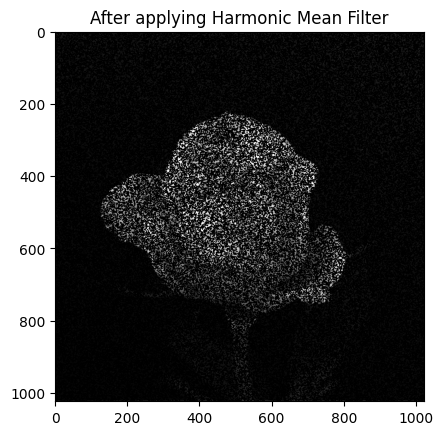

PSNR = 7.77


In [35]:
mask_size = 3
harmonic_filtered_image = apply_harmonic_mean_filter(noisy_character_image, mask_size)
plt.imshow(cv2.cvtColor(harmonic_filtered_image, cv2.COLOR_BGR2RGB))
plt.title("After applying Harmonic Mean Filter")
plt.show()
print(f"PSNR = {compute_psnr(noisy_character_image, harmonic_filtered_image)}")

apply geometric mean filter

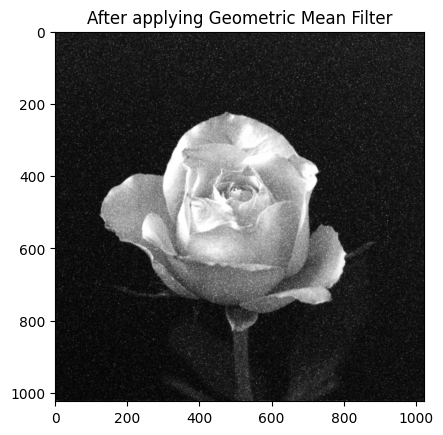

PSNR = 10.05


In [36]:
geometric_filtered_image = apply_geometric_mean_filter(noisy_character_image, mask_size)
plt.imshow(cv2.cvtColor(geometric_filtered_image, cv2.COLOR_BGR2RGB))
plt.title("After applying Geometric Mean Filter")
plt.show()
print(f"PSNR = {compute_psnr(noisy_character_image, geometric_filtered_image)}")